<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 3 &mdash; Drug Discovery (Assignment)</h2>

<b>Authors:</b> B. Schäfl, S. Lehner, J. Schimunek, J. Brandstetter<br>
<b>Date:</b> 23-04-2021

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2>Table of contents</h2>
<ol>
    <a href="#exercise-molecule-data-extraction"><li style="font-size:large;font-weight:bold">Extracting Information of MOL/SDF Representations</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-molecule-data-extraction-one"><li style="font-size:medium">Extracting properties</li></a>
        <a href="#exercise-molecule-data-extraction-two"><li style="font-size:medium">Inspecting atom numbers</li></a>
    </ol>
    <a href="#exercise-molecule-data-atoms-bonds"><li style="font-size:large;font-weight:bold">Atomic Properties and Bonds</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-molecule-data-atoms-bonds-one"><li style="font-size:medium">Extracting atomic properties</li></a>
        <a href="#exercise-molecule-data-atoms-bonds-two"><li style="font-size:medium">Extracting bond properties</li></a>
    </ol>
    <a href="#exercise-molecule-data-applications"><li style="font-size:large;font-weight:bold">Further Applications</li></a>
    <ol style="margin-bottom:15px">
        <a href="#exercise-molecule-data-applications-one"><li style="font-size:medium">Molecular substructure matching</li></a>
        <a href="#exercise-molecule-data-applications-two"><li style="font-size:medium">Molecular fingerprints</li></a>
        <a href="#exercise-molecule-data-applications-three"><li style="font-size:medium">Molecular clustering</li></a>
    </ol>
</ol>

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>
This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u3_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u3_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u3_utils as u3

# Import additional utilities needed in this notebook.
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from rdkit import Chem

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u3.setup_jupyter()

<h3 style="color:rgb(0,120,170)">Module versions</h3>
As mentioned in the introductiory slides, specific minimum versions of Python itself as well as of used modules is recommended.

In [2]:
u3.check_module_versions()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.20.2 (✓)
Installed pandas version: 1.2.4 (✓)
Installed PyTorch version: 1.8.1 (✓)
Installed scikit-learn version: 0.24.2 (✓)
Installed scipy version: 1.6.3 (✓)
Installed matplotlib version: 3.4.2 (✓)
Installed seaborn version: 0.11.1 (✓)
Installed PIL version: 8.1.2 (✓)
Installed rdkit version: 2021.03.1 (✓)


<a name="exercise-molecule-data-extraction"></a><h2>Extracting Information of MOL/SDF Representations</h2>
<p>The first step of working with molecule data is actually getting them into memory. <tt>RDKit</tt> provides this functionality with <code>SDMolSupplier</code> – be aware, that the specified file is <i>not</i> loaded at once, but piece by piece, depending on what information is retrieved. This behavior is solely for performance reasons, hence you do not need to worry about this besides <i>not</i> deleting/moving the specified data file during the whole process.</p>

<a name="exercise-molecule-data-extraction-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Load the <i>molecule</i> data set <tt>molecules.sdf</tt> using the appropriate function as supplied by <tt>RDKit</tt>.</li>
        <li>To avoid any problems with the <i>lazy</i> loading mechanics of <tt>RDKit</tt>, print the total amount of loaded molecules.</li>
        <li>Visualize the $16$ molecules with the <i>lowest LUMO</i> values in a <i>grid</i> including their <i>Formulas</i> as well as their <i>LUMO</i> values.</li>
        <li>What does the acronym <i>LUMO</i> stand for? Cite your sources (find an appropriate source, even if you know it by heart).</li>
    </ul>
</div>

In [3]:
data_molecules = Chem.SDMolSupplier(r'resources/molecules.sdf')

In [4]:
num_molecules = len(data_molecules)
print(f'{num_molecules} molecules loaded from file.')

218 molecules loaded from file.


In [5]:
l=list(range(0,218))
specific_molecules = [data_molecules[_] for _ in l]  
    

In [6]:
h=[]
for _ in specific_molecules:
    k=_.GetProp(r"LUMO")
    k=float(k)
    h.append(k)

h=sorted(h)[0:16]
print(h)
LUMO=[]
for _ in specific_molecules:
    for i in h:
        if float(_.GetProp(r"LUMO"))== i:
            LUMO.append(_)

[-3.768, -3.406, -3.172, -3.025, -2.871, -2.87, -2.837, -2.808, -2.791, -2.718, -2.71, -2.687, -2.68, -2.614, -2.562, -2.508]


In [7]:
LUMO=[]
for _ in specific_molecules:
    for i in h:
        if float(_.GetProp(r"LUMO"))== i:
            LUMO.append(_)
            
specific_molecule_labels = [
    f'{mol.GetProp(r"Formula")}: {mol.GetProp(r"LUMO")}' for mol in LUMO]

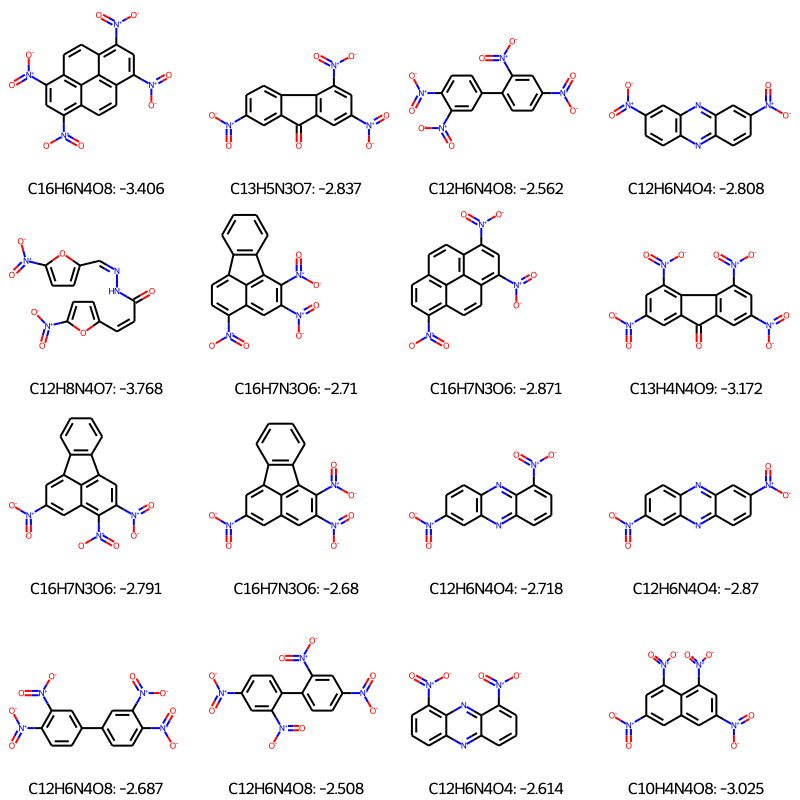

In [8]:
Chem.Draw.MolsToGridImage(
    LUMO,
    legends=specific_molecule_labels,
    maxMols=len(specific_molecules),
    molsPerRow=4)

In [9]:
#LUMO stands for lowest unoccupied molecular orbital (Mathammal, Jayamani and Geetha, 2013)
#Mathammal, R., Jayamani, N. and Geetha, N., 2013. Molecular Structure, NMR, HOMO, LUMO, and Vibrational Analysis of O-Anisic Acid and Anisic Acid Based on DFT Calculations. Journal of Spectroscopy, 2013, pp.1-18.

<a name="exercise-molecule-data-extraction-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>For each of the previously found molecules, <i>annote</i> their atoms and compute their respective <i>atom count</i>.</li>
        <li>Visualize the result in a <i>grid</i> including their <i>Formulas</i> as well as their <i>atom counts</i> (sorted according to <i>atom count</i>).</li>
        <li>Do you observe <i>visually similar</i> molecules? In either case, comment on their respective differences.</li>
    </ul>
</div>

In [10]:
def annotate_molecule_atoms(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule atoms with corresponding atom numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for atom in molecule_annotated.GetAtoms():
        atom.SetProp(r'atomNote', str(atom.GetIdx()))
    return molecule_annotated

In [11]:
specific_molecules_annotated = [annotate_molecule_atoms(molecule) for molecule in LUMO]
print(len(specific_molecules_annotated))

16


In [12]:
k=[]
for mol in specific_molecules_annotated:
    h=float(mol.GetNumAtoms())
    k.append(h)

output = []
for x in k:
    if x not in output:
        output.append(x)
output=sorted(output)

specific_molecules=[]
for i in output:
    for mol in specific_molecules_annotated:
        if float(mol.GetNumAtoms())==i:
            specific_molecules.append(mol)


In [13]:
specific_molecule_labels = [
    f'{mol.GetProp(r"Formula")}: {mol.GetNumAtoms()}' for mol in specific_molecules]


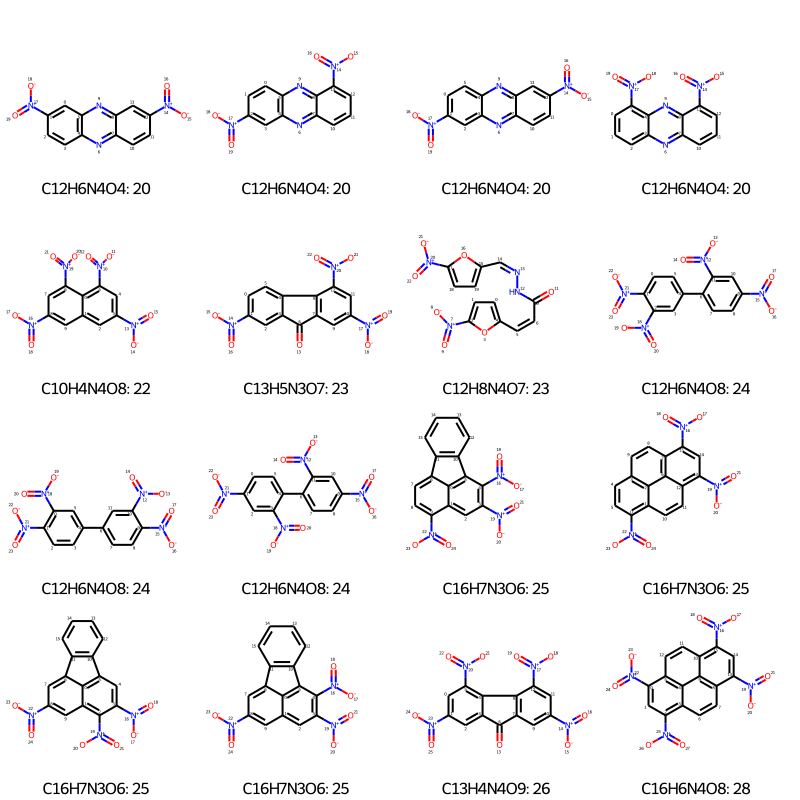

In [15]:
Chem.Draw.MolsToGridImage(
    specific_molecules,
    legends=specific_molecule_labels,
    maxMols=len(specific_molecules),
    molsPerRow=4)

In the first row, the molecules are very similar as carbons make up 3 hexagons and then only the 'bonds' of the other atoms are on different position. Overall, there are differences but it seems that the carbons usually make up hexagons and are close to each other, as much as possible. Even if they are not connected, as in case of molecule 7, they seem to 'attract' each other. Oxygen is not directly linked to C (except one case), however N is. The number of N atoms in the molecule, determines usually the number of branches. To N always none or 2 oxygens are connected.

<a name="exercise-molecule-data-atoms-bonds"></a><h2>Atomic Properties and Bonds</h2>
<p>Extracting <i>atomic</i> as well as <i>bond</i> properties often allows for a more throrough undertstanding of the molecules at hand. Unsurprisingly, <tt>RDKit</tt> provides the necessary functionality for this purpose – almost. The missing functionality may be taken from the exercise notebook, but needs to be adapted accordingly.</p>

<a name="exercise-molecule-data-atoms-bonds-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Compute the <i>amount of atoms</i> participating in a <i>ring structure</i> for each of the molecules of the previous exercise.</li>
        <li>Adapt and apply <code>annotate_molecule_atoms</code> in a way to <i>only</i> mark atoms <i>participating</i> in a ring structure with an <tt>R</tt>.</li>
        <li>Visualize the result in a <i>grid</i> including their <i>Formulas</i> as well as their <i>amount of ring atoms</i> (sorted according to the last).</li>
    </ul>
</div>

In [23]:
def annotate_molecule_ring(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule atoms with corresponding atom numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for atom in molecule_annotated.GetAtoms():
        if atom.IsInRing():
            atom.SetProp(r'atomNote', str('R'))
    return molecule_annotated

In [24]:
ring_molecules_annotated = [annotate_molecule_ring(molecule) for molecule in LUMO]

In [25]:
#get counts for atoms in 
l=[]
for mol in ring_molecules_annotated:
    i=0
    for atom in mol.GetAtoms():
        if atom.IsInRing():
            i+=1
    l.append(i)

output = []
for x in l:
    if x not in output:
        output.append(x)
output=sorted(output)
print(output)

[10, 12, 13, 14, 16]


In [26]:
ring_mol=[]
for j in output:
    for mol in ring_molecules_annotated:
        i=0
        for atom in mol.GetAtoms():
            if atom.IsInRing():
                i+=1
        if j==i:
            ring_mol.append(mol)
            
print(ring_mol[1])

In [27]:
specific_molecule_labels = []
for mol in ring_mol:
    i=0
    for atom in mol.GetAtoms():
        if atom.IsInRing():
            i+=1
    specific_molecule_labels.append( f'{mol.GetProp(r"Formula")}: {i}')


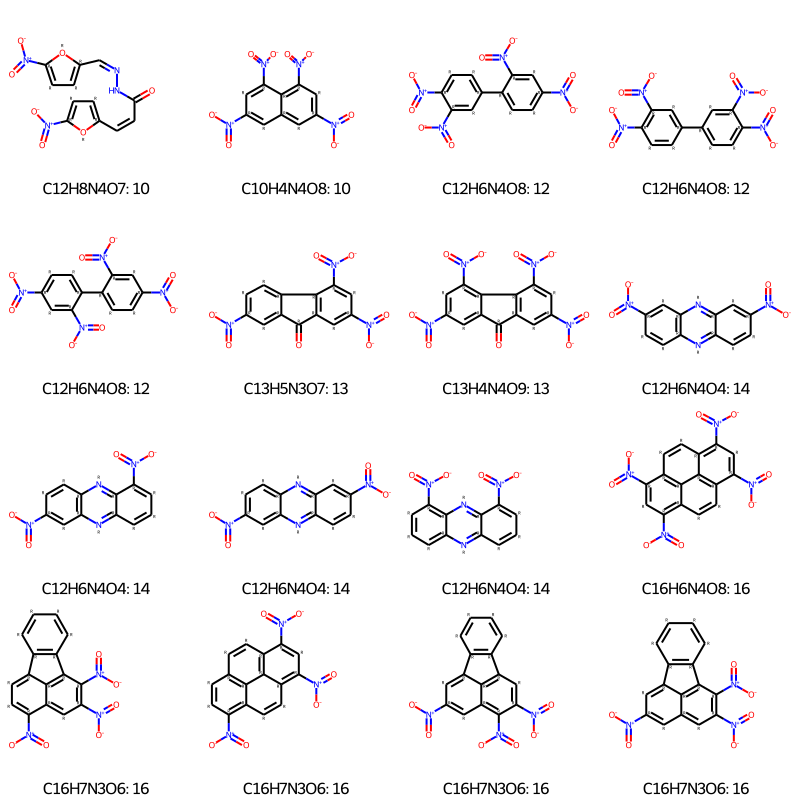

In [28]:
Chem.Draw.MolsToGridImage(
    ring_mol,
    legends=specific_molecule_labels,
    maxMols=len(specific_molecules),
    molsPerRow=4)

<a name="exercise-molecule-data-atoms-bonds-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Compute the <i>amount of bonds</i> for each of the molecules of the previous exercise (disregarding their specific <i>type</i>).</li>
        <li>Adapt and apply <code>annotate_molecule_bonds</code> in a way to mark bonds with the <i>first letter</i> of their respective <i>type</i>.</li>
        <li>Visualize the result in a <i>grid</i> including their <i>Formulas</i> as well as their <i>amount of bonds</i> (sorted according to the last).</li>
    </ul>
</div>

In [29]:
#get counts of bonds
bonds=[]
for mol in LUMO:
    i=0
    for bond in mol.GetBonds():
        i+=1
    bonds.append(i)         

#get counts of bonds and unique values
output = []
for x in bonds:
    if x not in output:
        output.append(x)
output=sorted(output)
print(output)

[22, 23, 24, 25, 28, 31]


In [30]:
def annotate_molecule_bonds(molecule: Chem.rdchem.Mol) -> Chem.rdchem.Mol:
    """
    Annotate molecule bonds with corresponding bond numbers.
    
    :param molecule: molecule to annotate
    :return: annotated molecule
    """
    molecule_annotated = deepcopy(molecule)
    for bond in molecule_annotated.GetBonds():
        bond.SetProp(r'bondNote', str(bond.GetBondType())[0])
    return molecule_annotated

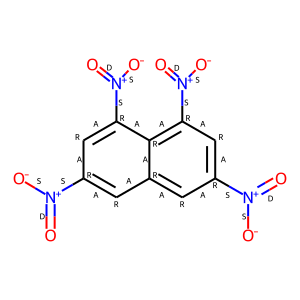

In [31]:
j=ring_mol[1]
print(j)
specific_molecule_annotated = annotate_molecule_bonds(j)
Chem.Draw.MolToImage(specific_molecule_annotated)

In [32]:
ring_molecules_annotated = [annotate_molecule_bonds(molecule) for molecule in LUMO]

In [33]:
#pair amount of bonds to molecule
bonds_mol=[]
for j in output:
    for mol in ring_molecules_annotated:
        i=0
        for bond in mol.GetBonds():
                i+=1
        if j==i:
            bonds_mol.append(mol)
         

In [34]:
#labels for bonds
specific_molecule_labels = []
for mol in bonds_mol:
    i=0
    for bond in mol.GetBonds():
            i+=1
    specific_molecule_labels.append( f'{mol.GetProp(r"Formula")}: {i}')


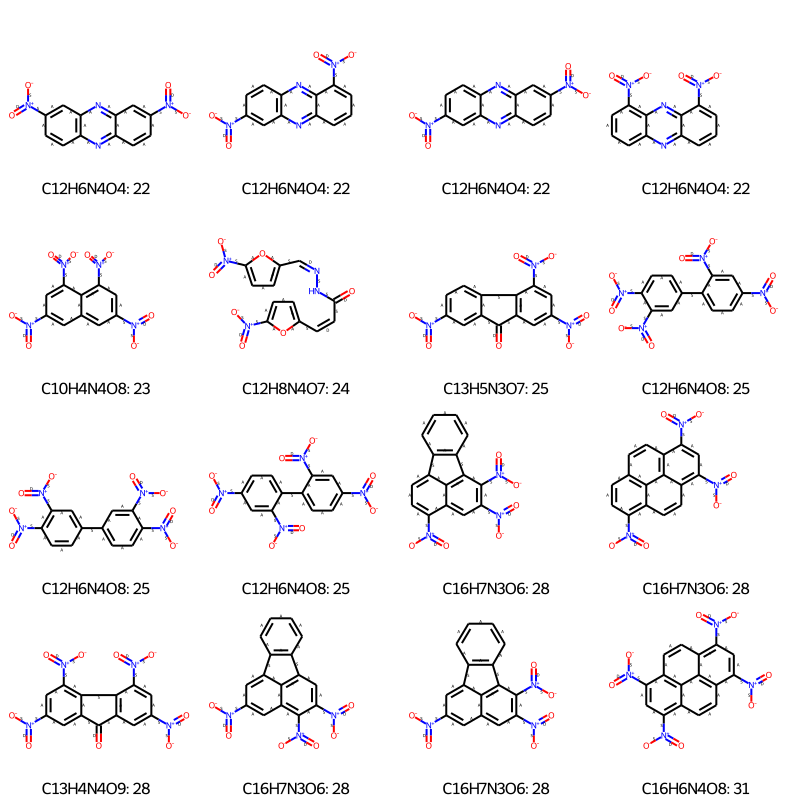

In [35]:
Chem.Draw.MolsToGridImage(
    bonds_mol,
    legends=specific_molecule_labels,
    maxMols=len(specific_molecules),
    molsPerRow=4)

<a name="exercise-molecule-data-applications"></a><h2>Further Applications</h2>
<p>In the following exercises, you'll have to dig into the more interesting applications of chemoinformatics, namely:
<ul>
    <li>molecular substructure matching</li>
    <li>molecular fingerprints</li>
    <li>molecular clustering</li>
</ul></p>

<a name="exercise-molecule-data-applications-one"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Specify a <tt>C(=O)</tt> template and scan the molecules data set. Visualize the template including a respective <i>atom numbering</i>.</li>
        <li>For each of the found molecules, <i>annote</i> their atoms and compute their respective <i>substructure matches</i> (w.r.t. <tt>C(=0)</tt>).</li>
        <li>Visualize the result in a <i>grid</i> including their <i>substructure matches</i>. Can you recognize the substructures in the plot?</li>
    </ul>
</div>

In [28]:
data_molecules = Chem.SDMolSupplier(r'resources/molecules.sdf')

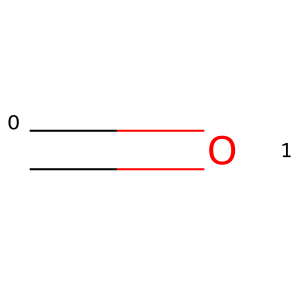

In [29]:
specific_pattern = Chem.MolFromSmiles(r'C(=O)')
Chem.Draw.MolToImage(annotate_molecule_atoms(specific_pattern))

In [30]:
# First, all molecules need to be converted to corresponding SMILES representations.
data_molecules = [annotate_molecule_atoms(molecule) for molecule in data_molecules]

In [31]:
matched_molecules=[]
for molecule in data_molecules:
     if molecule.HasSubstructMatch(specific_pattern):
        matched_molecules.append(molecule)
        
match=[]
for molecule in matched_molecules:
    k=molecule.GetSubstructMatches(specific_pattern)
    match.append(k)


output = []
for x in match:
    if x not in output:
        output.append(x)
output=sorted(output)


In [32]:
labels=[]
for i in output:
    for mol in matched_molecules:
        if mol.GetSubstructMatches(specific_pattern)==i:
            labels.append( f'{mol.GetProp(r"Formula")}: {i}')
            
print(labels)

['C8H7NO3: ((6, 7),)', 'C7H5NO3: ((6, 7),)', 'C7H5NO3: ((6, 7),)', 'C6H7N4O3S: ((6, 10),)', 'C13H7NO3: ((6, 13),)', 'C13H5N3O7: ((6, 13),)', 'C13H6N2O5: ((6, 13),)', 'C13H4N4O9: ((6, 13),)', 'C8H3N2O4: ((7, 10), (8, 9))', 'C15H11NO3: ((8, 9),)', 'C15H10N2O5: ((8, 9),)', 'C5H3NO4: ((8, 9),)', 'C6H6N4O4: ((8, 10),)', 'C8H6N4O5: ((9, 13), (11, 12))', 'C12H8N4O7: ((10, 11),)', 'C7H5NO4: ((10, 11),)', 'C8H7N3O5: ((14, 15),)', 'C15H11NO4: ((17, 18),)', 'C15H9F3N2O3: ((17, 18),)', 'C15H12N2O3: ((17, 18),)', 'C18H11NO4: ((20, 21),)']


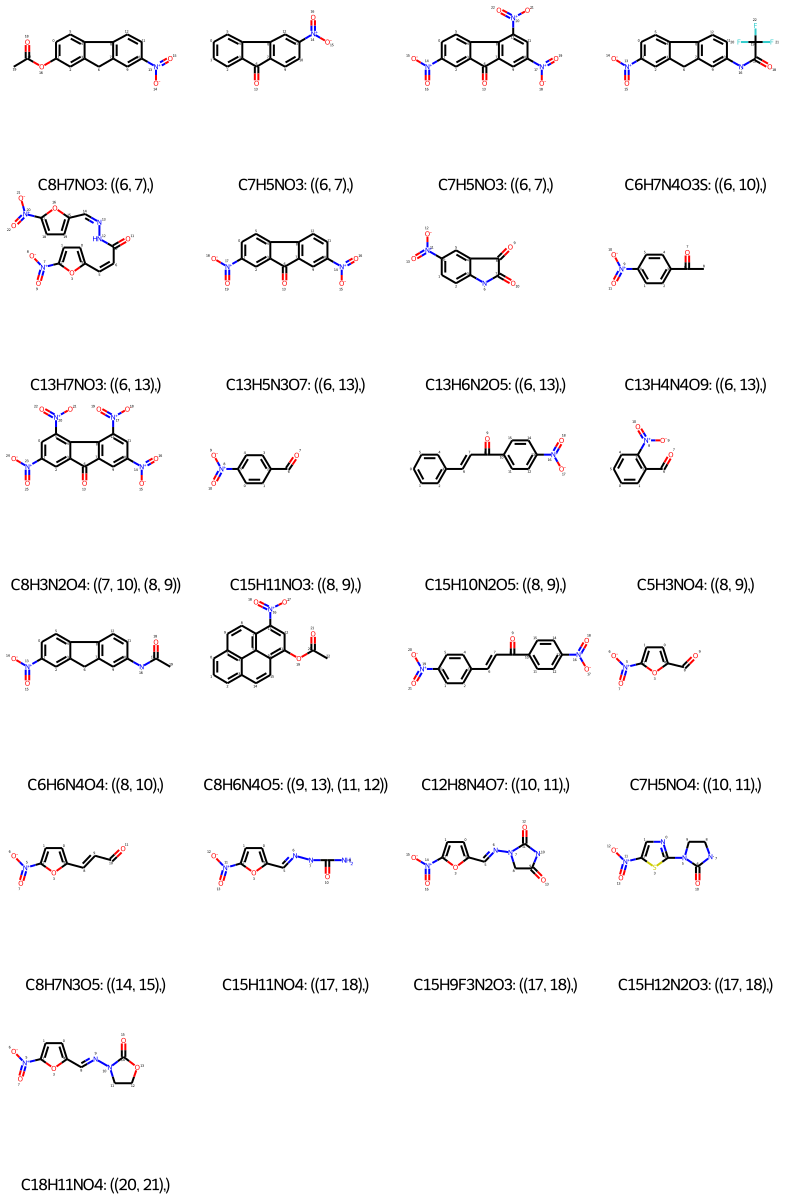

In [33]:
Chem.Draw.MolsToGridImage(
    matched_molecules,
    legends=labels,
    maxMols=len(matched_molecules),
    molsPerRow=4)


Yes, the substructure is visible. 

<a name="exercise-molecule-data-applications-two"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Compute the <i>ECFPs</i> from the previously found molecules and visualize them in tabular form (use a <i>fold size</i> of $256$).</li>
        <li>How many <i>substructures</i> are present in each molecule? Compute and sort their <i>total amount</i> for each molecule.</li>
    </ul>
</div>

In [34]:
# First, all molecules need to be converted to corresponding SMILES representations.
data_molecules_smiles = [Chem.MolToSmiles(molecule) for molecule in matched_molecules]

In [35]:
# Afterwards, ECFPs are computed and visualized in tabular form.
data_molecules_ecfps = u3.compute_ecfps(data_molecules_smiles, fold=256)
data_molecules_ecfps

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
6,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [37]:
pd.DataFrame(data_molecules_ecfps.sum(axis=1)).transpose()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,45,34,41,48,46,26,34,23,29,20,...,26,45,46,33,24,31,37,44,37,40


<a name="exercise-molecule-data-applications-three"></a><div class="alert alert-warning">
    Execute the notebook until here and try to solve the following tasks:
    <ul>
        <li>Downproject the previously computed <i>ECFPs</i> using <i>PCA</i>. Visualize the result in a <i>scatter plot</i>. Are there any visible clusters?</li>
            <li>Cluster the resulting downprojections using <i>affinity propagation</i>. Why would <i>k-means</i> be a little bit disadvantageous here?</li>
        <li>Plot all molecules of all <i>clusters</i> in separate <i>grids</i> including their <i>Compound Name</i> and <i>Activity</i>. Do you see similarities?</li>
    </ul>
</div>

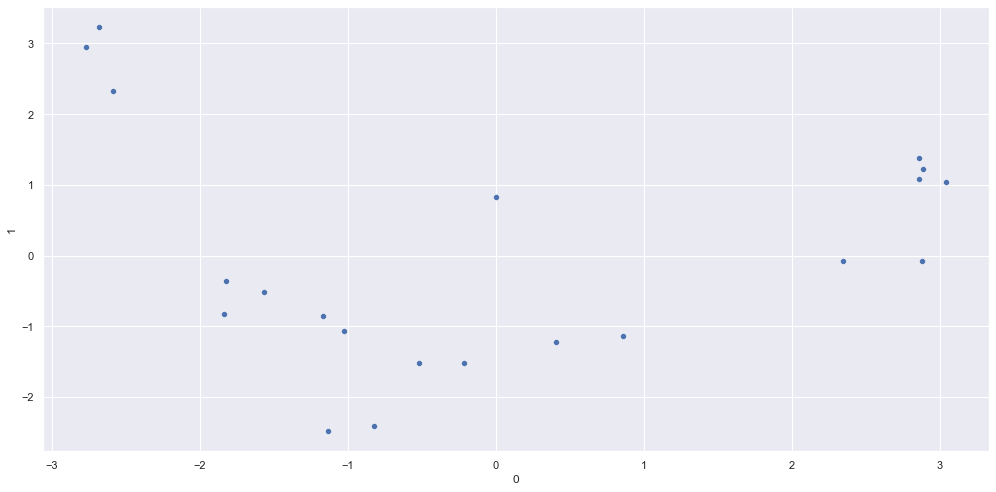

In [38]:
# Set default plotting style and random seed for reproducibility.
sns.set()
np.random.seed(seed=42)

# Compute Principal Component Analysis (PCA) and reduce the dimensionality of the ECFPs.
data_molecules_ecfps_pca = u3.apply_pca(n_components=2, data=data_molecules_ecfps)
u3.plot_points_2d(data=data_molecules_ecfps_pca, figsize=(14, 7))

#the possible clusters are not very dense, we could probably devide it into three clusters -> 
#1) x=-2, 2)from x=2 and 3) the middle part

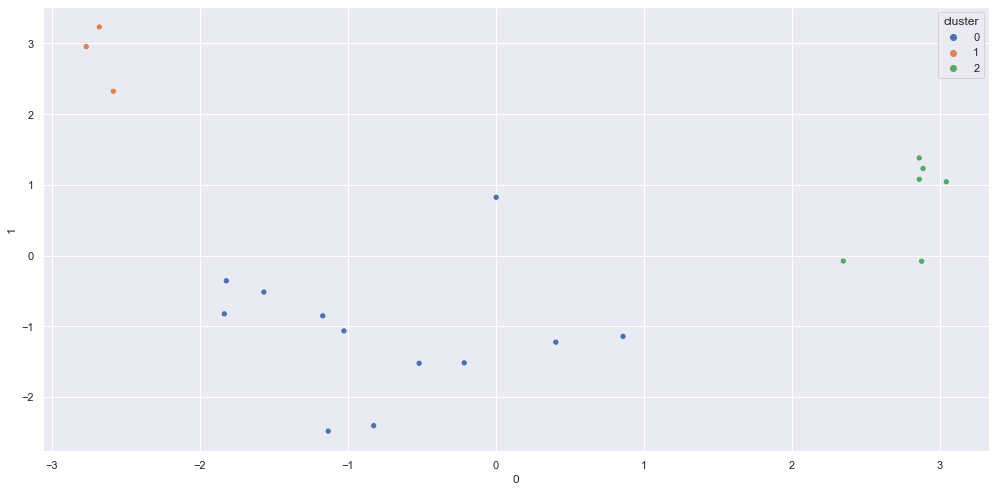

In [39]:
# Set default plotting style and random seed for reproducibility. 
sns.set()
np.random.seed(seed=42)

# Compute affinity propagation on the t-SNE downprojected data set.
data_molecules_ecfps_pca_ap = data_molecules_ecfps_pca.copy()
data_molecules_ecfps_pca_ap[r'cluster'] = u3.apply_affinity_propagation(data=data_molecules_ecfps_pca_ap)
u3.plot_points_2d(data=data_molecules_ecfps_pca_ap, target_column=r'cluster', figsize=(14, 7))
#k-means would be disadvantegous, because it computes n clusters of equal variance, thus many clusters would be present here
#as data are spread far from each other in the middle part, thus we would get too many clusters

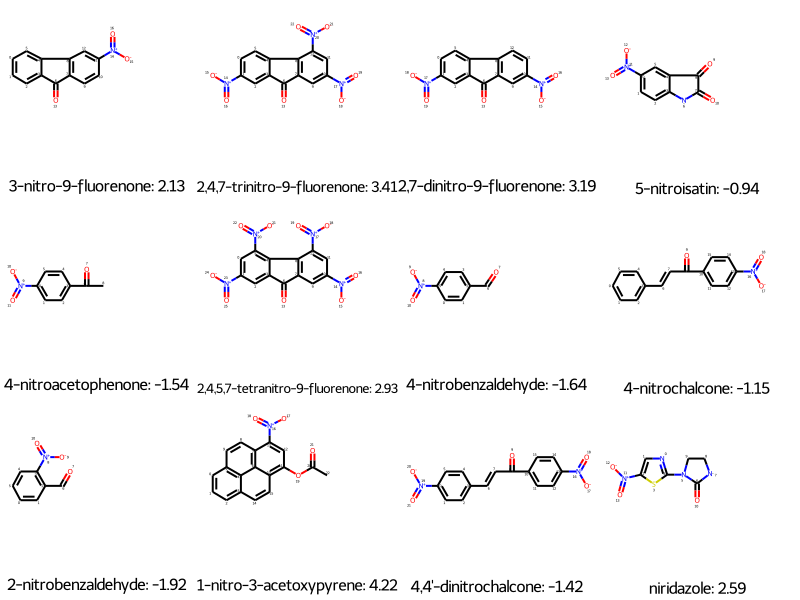

In [41]:
# Select specific molecules and extract some of their properties.
specific_molecules = data_molecules_ecfps_pca_ap[data_molecules_ecfps_pca_ap[r'cluster'] == 0].index
specific_molecules = [matched_molecules[_] for _ in specific_molecules]
specific_molecule_labels = [
    f'{mol.GetProp(r"Compound Name")}: {mol.GetProp(r"Activity")}' for mol in specific_molecules]

# Plot specified molecules with extracted properties as labels in a grid plot.
Chem.Draw.MolsToGridImage(
    specific_molecules,
    legends=specific_molecule_labels,
    maxMols=len(specific_molecules),
    molsPerRow=4)

#these seem very different, it is not so suprising according to a graph

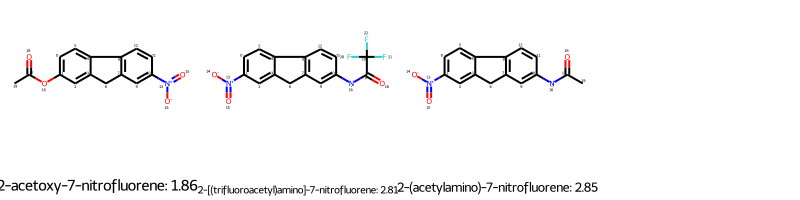

In [42]:
# Select specific molecules and extract some of their properties.
specific_molecules = data_molecules_ecfps_pca_ap[data_molecules_ecfps_pca_ap[r'cluster'] == 1].index
specific_molecules = [matched_molecules[_] for _ in specific_molecules]
specific_molecule_labels = [
    f'{mol.GetProp(r"Compound Name")}: {mol.GetProp(r"Activity")}' for mol in specific_molecules]

# Plot specified molecules with extracted properties as labels in a grid plot.
Chem.Draw.MolsToGridImage(
    specific_molecules,
    legends=specific_molecule_labels,
    maxMols=len(specific_molecules),
    molsPerRow=4)

#these have very similar bonds between two hexagons

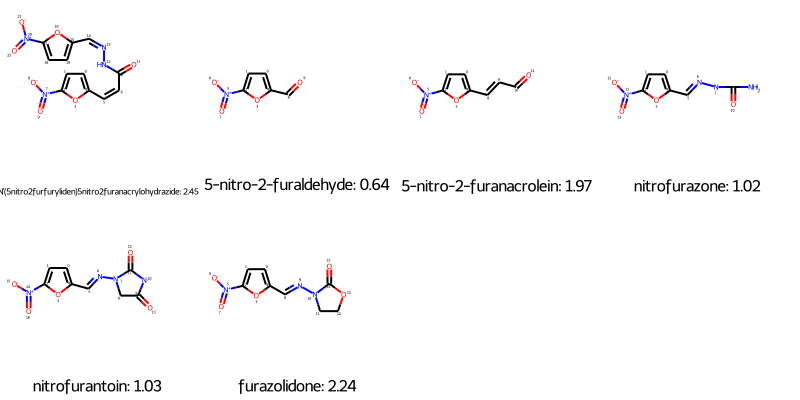

In [43]:
# Select specific molecules and extract some of their properties.
specific_molecules = data_molecules_ecfps_pca_ap[data_molecules_ecfps_pca_ap[r'cluster'] == 2].index
specific_molecules = [matched_molecules[_] for _ in specific_molecules]
specific_molecule_labels = [
    f'{mol.GetProp(r"Compound Name")}: {mol.GetProp(r"Activity")}' for mol in specific_molecules]

# Plot specified molecules with extracted properties as labels in a grid plot.
Chem.Draw.MolsToGridImage(
    specific_molecules,
    legends=specific_molecule_labels,
    maxMols=len(specific_molecules),
    molsPerRow=4)

#these have one cyclical structure or two separated ones